In [115]:
# Dependencies (pip install citipy)

from citipy import citipy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from config import open_weather_key

In [27]:
# API Keys
api_key = open_weather_key

In [28]:
# Return 500 Random City Coordinates

lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

In [29]:
city_names = []
country_code = []
cloudines = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

for i in range(0,500):
    
    city = citipy.nearest_city(lats[i],lngs[i])
    
    # Append the city and country names to the empty lists 
    
    city_names.append(city.city_name)
    country_code.append((city.country_code).upper())
    
    # Set up the params for the base url
    params = {
    'lat': lats[i],
    'lon': lngs[i],
    'units': 'metric',
    'appid': api_key
    }
    
    # Set up the base url 
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    response = req.get(base_url, params = params)
    
    response_number = [response.url]
    count = count + len(response_number)
        
    city_weather = response.json()
        
    # Fill up the empty list based on API response from the url 
    cloudines.append(city_weather['clouds']['all'])
    date.append(city_weather['dt'])
    humidity.append(city_weather['main']['humidity'])
    
    lat.append(round(lats[i]))
    lng.append(round(lngs[i]))
    
    max_temp.append(city_weather['main']['temp_max'])
    wind_speed.append(city_weather['wind']['speed'])

In [30]:
# Print out city names

for j in range(len(city_names)):
    print(city_names[j]+','+country_code[j])

sataua,WS
alyangula,AU
vaini,TO
zhaotong,CN
basco,PH
ushuaia,AR
saint anthony,CA
saint-philippe,RE
puerto ayacucho,VE
qaqortoq,GL
rikitea,PF
kodiak,US
vaini,TO
bethel,US
san patricio,MX
tuktoyaktuk,CA
olinda,BR
aljezur,PT
atuona,PF
jamestown,SH
port blair,IN
los llanos de aridane,ES
cabo san lucas,MX
bethel,US
amderma,RU
alekseyevka,KZ
kogon,UZ
punta arenas,CL
arraial do cabo,BR
provideniya,RU
tasiilaq,GL
chuy,UY
la palma,PA
kavieng,PG
cabo san lucas,MX
santa eulalia del rio,ES
cabo san lucas,MX
iqaluit,CA
upernavik,GL
khatanga,RU
urumqi,CN
chokurdakh,RU
busselton,AU
bambous virieux,MU
albany,AU
muli,MV
butaritari,KI
belushya guba,RU
usilampatti,IN
atuona,PF
tuatapere,NZ
mataura,PF
temerloh,MY
saleaula,WS
bethel,US
grand gaube,MU
punta arenas,CL
kapaa,US
puerto escondido,MX
port elizabeth,ZA
one hundred mile house,CA
vaini,TO
vaini,TO
bridgetown,BB
hermanus,ZA
isangel,VU
saint george,BM
mtwara,TZ
svetlyy,RU
grindavik,IS
khatanga,RU
san quintin,MX
new norfolk,AU
sinnamary,GF
hilo,US
wai

In [31]:
# Create dictionary

city_data = {
    'City':city_names,
    'Cloudines': cloudines,
    'Country': country_code,
    'Date': date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed': wind_speed,
    }

In [32]:
# Create DataFrame
city_data = pd.DataFrame(city_data)
city_data.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sataua,20,WS,1511068214,100,-7.0,-173.0,27.99,2.46
1,alyangula,0,AU,1511068214,96,-16.0,138.0,30.89,5.21
2,vaini,32,TO,1511068215,100,-57.0,-175.0,4.64,19.61
3,zhaotong,92,CN,1511068215,97,28.0,104.0,7.19,1.46
4,basco,92,PH,1511068216,100,21.0,124.0,24.96,12.31


In [107]:
# Temperature (F) vs. Latitude Scatter Plot

plt.scatter(city_data['Lat'], city_data['Max Temp'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('Temperature (F) vs. Latitude (11/18/2017)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('TempVSLatitude.png')

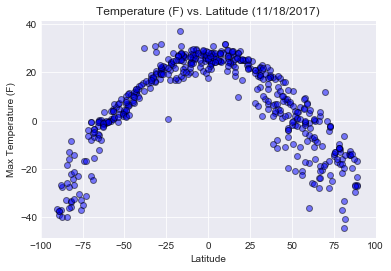

In [108]:
plt.show()

In [109]:
# Humidity (%) vs. Latitude Scatter Plot

plt.scatter(city_data['Lat'], city_data['Humidity'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('Humidity (%) vs. Latitude (11/18/2017)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('HumidityVSLatitude.png')

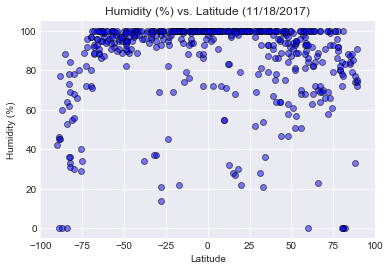

In [110]:
plt.show()

In [111]:
# Cloudiness (%) vs. Latitude Scatter Plot

plt.scatter(city_data['Lat'], city_data['Cloudines'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('Cloudiness (%) vs. Latitude (11/18/2017)')
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CloudinessVSLatitude.png')

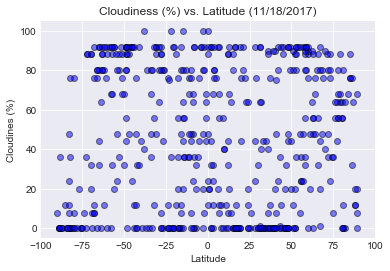

In [112]:
plt.show()

In [113]:
# Wind Speed (mph) vs. Latitude Scatter Plot

plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('Wind Speed (mph) vs. Latitude (11/18/2017)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('WindSpeedVSLatitude')

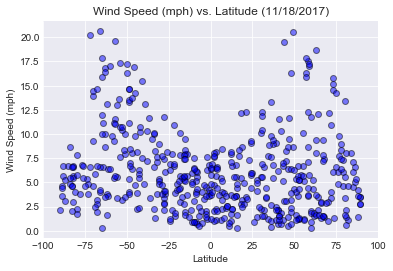

In [114]:
plt.show()